In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [21]:
ROOT_FOLDER = Path("/home/robin/projects/TEDx/")

file_csv = ROOT_FOLDER / "data" / "Travel" / "carbon-footprint-travel-mode.csv"

images_dir = Path(ROOT_FOLDER / "output" / "images" / "travel")
images_dir.mkdir(parents=True, exist_ok=True)

plt.style.use("default")

In [22]:
em = pd.read_csv(file_csv, index_col="Mezzo")
em = em.drop(columns=["Code", "Year"])
em = em.sort_values(by="Emissioni per chilometro viaggiato")
em.head()

,Emissioni per chilometro viaggiato
Mezzo,
Traghetto,18.74
Corriera,27.33
Metropolitana,27.81
Tram,28.61
Treno nazionale,35.49


Text(0, 0.5, '')

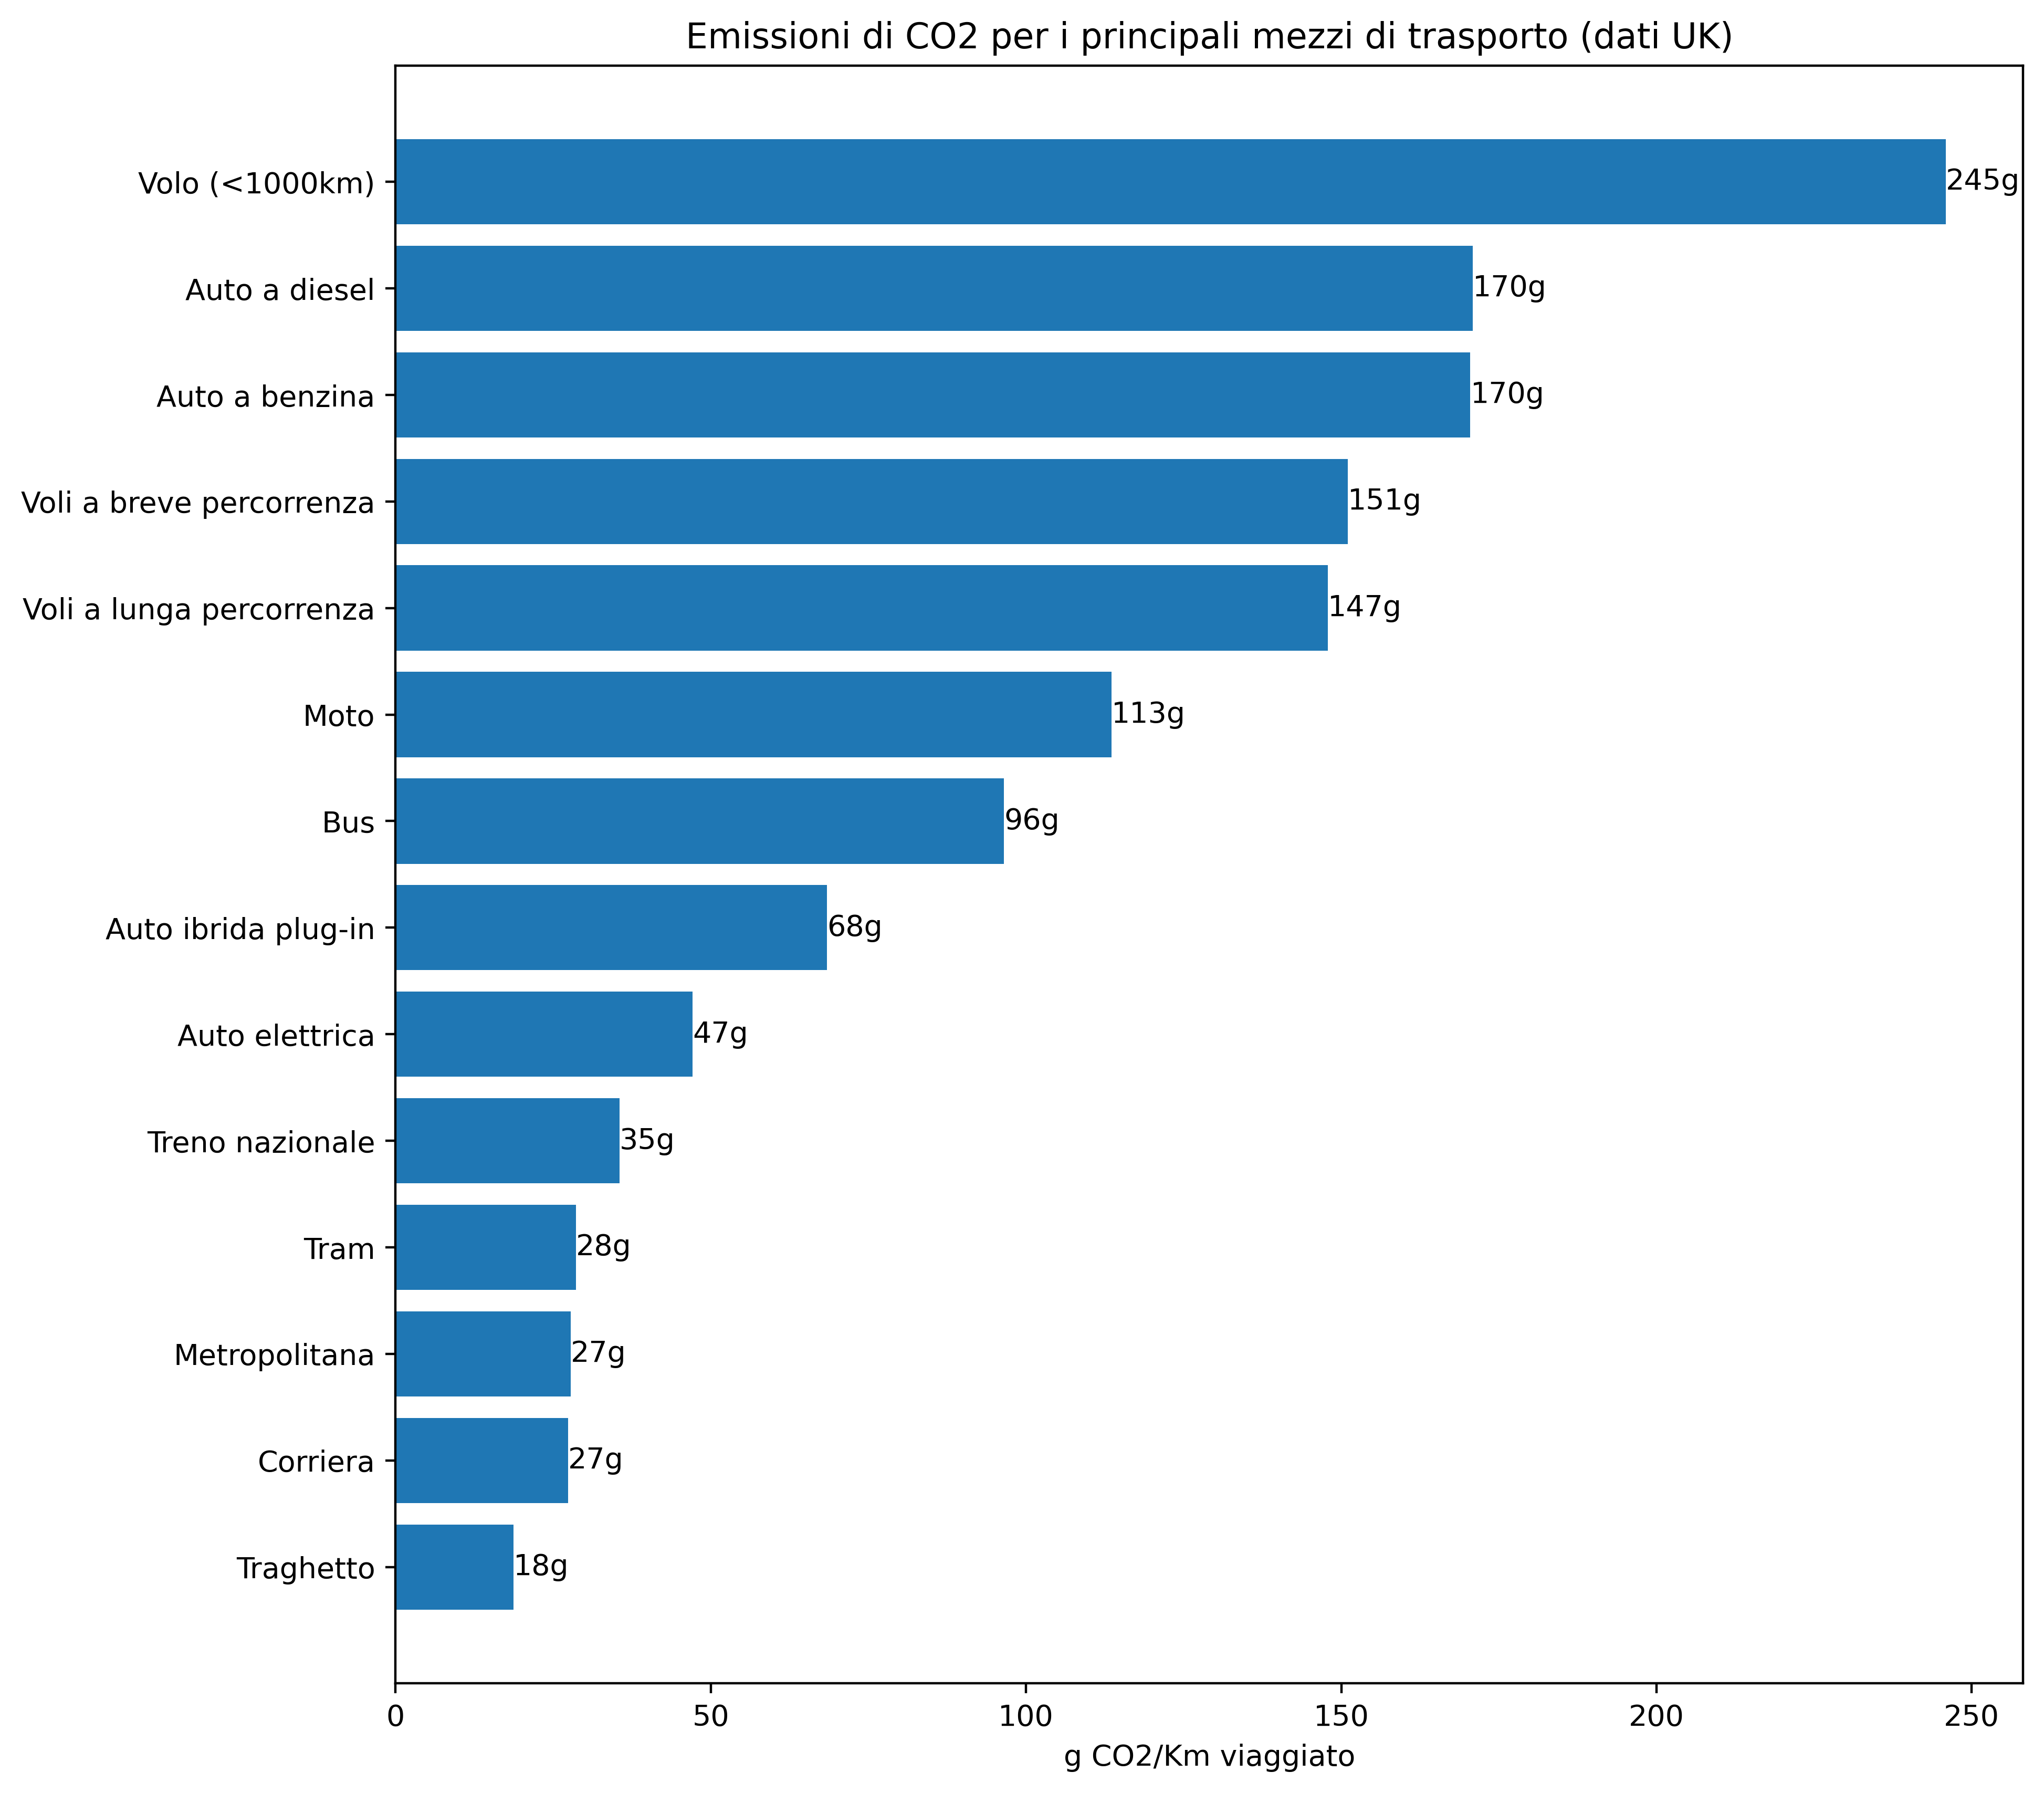

In [24]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=400)
bars = ax.barh(em.index, em["Emissioni per chilometro viaggiato"])
ax.bar_label(bars, fmt="%dg")
ax.set_title("Emissioni di CO2 per i principali mezzi di trasporto (dati UK)")
ax.set_xlabel("g CO2/Km viaggiato")
ax.set_ylabel(None)